# Linear Regression Metrics and Coefficients

a= 0.4 b= 0.8
x values: [1 2 3 4 5]
y values: [1 3 2 3 5]
predicted values: [1.2, 2.0, 2.8, 3.6, 4.4]


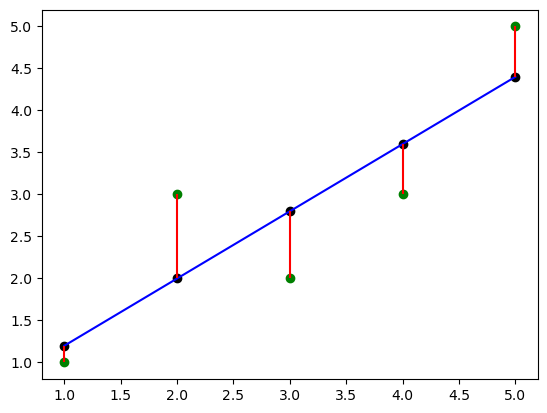

In [ ]:
# plot x, y coordinates
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

# create basic scatterplot
plt.plot(x, y, 'go',)

# obtain a and b of linear regression line
b, a = np.polyfit(x, y, 1)
print('a=', a.round(1), 'b=', b.round(1))

# predicted values
y_hat = [round(a + (b*x), 2) for x in x]
print(f'x values: {x}')
print(f'y values: {y}')
print(f'predicted values: {y_hat}')
plt.plot(x, y_hat, 'ko')

# add linear regression line to scatterplot
plt.plot(x, a+b*x, 'b')

# ax.vlines(x,y,y)
plt.vlines(x, y, a+b*x, 'r')

plt.show()

###  MSE

$\frac{1}{n}\sum(y-\hat{y})^2$

vs.

### Variance (sample)

$\frac{1}{n-1}\sum(x-\bar{x})^2$

In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate... The MSE can be written as the sum of the variance of the estimator and the squared bias of the estimator, providing a useful way to calculate the MSE and implying that in the case of unbiased estimators, the MSE and variance are equivalent.

https://en.wikipedia.org/wiki/Mean_squared_error

In datasets with a small spread all values are very close to the mean, resulting in a small variance and standard deviation. Where a dataset is more dispersed, values are spread further away from the mean, leading to a larger variance and standard deviation.

https://www.abs.gov.au/websitedbs/D3310114.nsf/home/statistical+language+-+measures+of+spread

### R Squared

**Traditional**

* $SS_{res} = \sum{(y - \hat{y})^2}$
* $SS_{tot} = \sum{(y - \bar{y})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

**Out Of Sample (OOS)**

* $SS_{res} = \sum{(y - \hat{y})^2}$
* $SS_{tot} = \sum{(y - \bar{y}_{train})^2}$
* $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

https://towardsdatascience.com/whats-wrong-with-r-squared-and-how-to-fix-it-7362c5f26c53

In statistics, the Pearson correlation coefficient ― also known as Pearson's r ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

https://en.wikipedia.org/wiki/Coefficient_of_determination

* r shows correlation between x and y
* r squared shows strength of model, the proportion of the variance y that can be explained by X in a linear regression model
* **R-Squared, R, r, TSS ESS and RSS Notebook**

### Adjusted R Squared

Features are considered

* $Adj R^2 = 1 - (1 - R^2)\frac{n-1}{n-p-1}$ where p = number of features and n = size of dataset
* $R^2$ will never decrease adding more features
* Adj R squared accounts for relevant features
* Adjusted $R^2$ will be influenced by an increase of $p$

### MSE or R Squared

It is recommended to use R-Squared or rather adjusted R-Squared for evaluating the model performance of the regression models. This is primarily because R-Squared captures the fraction of variance of actual values captured by the regression model and tends to give a better picture of the quality of the regression model. Also, MSE values differ based on whether the values of the response variable are scaled or not. A better measure instead of MSE is the root mean squared error (RMSE) which takes care of the fact related to whether the values of the response variable are scaled or not.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

## Least Squares

The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals (a residual being: the difference between an observed value, and the fitted value provided by a model) made in the results of each individual equation.

https://en.wikipedia.org/wiki/Least_squares

### The Constant

In linear regression you need the constant so that lines are not constrained to pass through the origin. Think of the linear model y=b1x1+b2x2+.... If all xi are 0, y must be 0, you need an additional parameter to represent the intercept

https://datascience.stackexchange.com/questions/55598/why-we-add-a-constant-value-column-in-our-dataframe-sometimes

... our regression slopes would be less useful (without the constant).

1. Imagine the equation for a line: y=mx + b -> take the constant out and you have y=mx which means that the slope will have to account for a larger explanation than with the constant.
2. think of the constant as the “baseline” of the data and the explanatory values (the beta slopes) as the things that can affect this mean. For example, ...suppose a particular leaf will average 2 inches long (constant), but with different weather conditions, the leaf will either grow (+ length) or grow (- length). Without the constant, all the data will point to the weather conditions having a tremendous weight on the regressions - mathematically showing y = weather conditions times slope.

In a nut shell, it’s there to assist in providing an accurate view of the slope values.

https://www.quora.com/In-regression-why-do-we-include-a-constant-term (Hamilton Goff)

The constant term prevents this overall bias by forcing the residual mean to equal zero. Imagine that you can move the regression line up or down to the point where the residual mean equals zero. For example, if the regression produces residuals with a positive average, just move the line up until the mean equals zero.

https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/

# Statsmodels and Ordinary Least Squares

In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

https://en.wikipedia.org/wiki/Ordinary_least_squares

## Adding a Constant (or Intercept)

As a rule, the constant term is always included in the set of regressors X ...

https://en.wikipedia.org/wiki/Ordinary_least_squares

The intercept (often labeled the constant) is the expected mean value of y when all X=0.

https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

Immediately above, we saw a key reason why you should include the constant in your regression model. It guarantees that your residuals have a mean of zero. Additionally, if you don’t include the constant, the regression line is forced to go through the origin. This means that all of the predictors and the response variable must equal zero at that point. If your fitted line doesn’t naturally go through the origin, your regression coefficients and predictions will be biased if you don't include the constant.

https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

advertising = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1),
    advertising['sales'],
    test_size=0.25,
    random_state=42)

X_train.insert(0, 'const', 1)
X_test.insert(0, 'const', 1) # constant just for show, we remove the constant later
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.02e-71
Time:                        17:59:05   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
TV             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS Regression Results Explanation

* Endog(enous): Similar to the dependent variable
* Exog(enous): Similar to the independent variable
* https://www.statisticshowto.com/endogenous-variable/
* https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### Model Info
* Dep. Varialble: the response variable, dependent, outcome, etc.
* Model: what model are we using (ordinary least squares) for the training
* Method: how the parameters (coefficients) were calculated
* No. Observations: the number of observations, rows... (n)
* DF Residuals: degrees of freedom of the residuals
* DF Model: number of parameters in the model excluding the constant if present
* Covariance Type: deals with violations of assumptions

### Goodness of Fit
* R-Squared: coefficient of determination, how well the regression fits the data
* Adj R-Squared: R-squared adjustment based on number of parameters and df residuals
* F statistic: a measure of how significant the fit is
* Prop F statistic: the probability that you would get the F stat given the null hypothesis
* Log-Liklihood: can be used to compare the fit of different coefficients, the higher valur is better
* AIC: Akaike Information Criterion is used to compare models, a lower score is better (doesn't address features, just the overall model)
* BIC: Bayesian Information Criterion is similar to AIC but uses a higher penalty

### Coefficients
* coef: the estimated value of the coefficient
* std error: the basic standard error of the estimate of the coefficient
* t: the t-statistic value, how significant the coefficient is
* P>|t|: the p-value, indicates a statistically significant relationship to the dependent variable if less than the confidence level, usually 0.05
* 95% confidence interval: the lower and upper values

### Statistical Tests
* Skewness: A measure of the symmetry of the data about the mean
* Kurtosis: A measure of the shape of the data
* Omnibus: D'Angostino's test provides a combined test for the presence of skewness and kurtosis
* Prob(Omnibus): probability of Omnibus
* Jarque-Bera: Another test for skewness and kurtosis
* Prob(Jarque-Bera): probability of Jarque-Bera
* Durbin-Watson: A test for the presence of autocorrelation, if the errors aren't independent
* Cond No: A test for multicollinearity

## Sklearn Linear Regression Model

In [ ]:
# create and train the model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train.drop('const', axis=1), y_train)

# training set R²
yhat = lr_model.predict(X_test.drop('const', axis=1))
print('r squared: ', lr_model.score(X_train.drop('const', axis=1), y_train))

r squared:  0.8966445527601499


In [ ]:
# view the coefficients and intercept
print(lr_model.intercept_)
print(list(zip(X_train.drop('const', axis=1), lr_model.coef_)))

2.778303460245283
[('TV', 0.045433558624649886), ('radio', 0.19145653561741383), ('newspaper', 0.002568090815700606)]


### The Formula

$\hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3$

In [ ]:
# stats model ols coefficients comparision with linear regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.02e-71
Time:                        17:59:05   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
TV             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Standard Error of the Estimate

* Represents the average distance that the observed values fall from the regression line
* Smaller values are better because the residual is closer to the fitted line
* 95% of the observations should fall within $\pm 2*stderr$

In [ ]:
# example for TV
print(0.0454 - (2 * 0.002), 0.0454 + (2 * 0.002))

0.041400000000000006 0.0494


### Interpreting the Coefficient

* **COEFFICIENT INTERPRETATION NOTEBOOK**